IMPORT LIBRARY

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

READ DATASET

In [2]:
from google.colab import files
uploaded = files.upload()

# Download dataset from https://drive.google.com/drive/folders/1gv49H-nrzvGfXJDwsvl_VSUq-u6ddng9?usp=sharing

Saving Disease Recognition.csv to Disease Recognition.csv


## Data Exploration

In [3]:
data = pd.read_csv('Disease Recognition.csv')
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
## Charactieristics of data

data.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [5]:
data.shape

(4920, 18)

In [6]:
## Check null values

null_checker = data.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


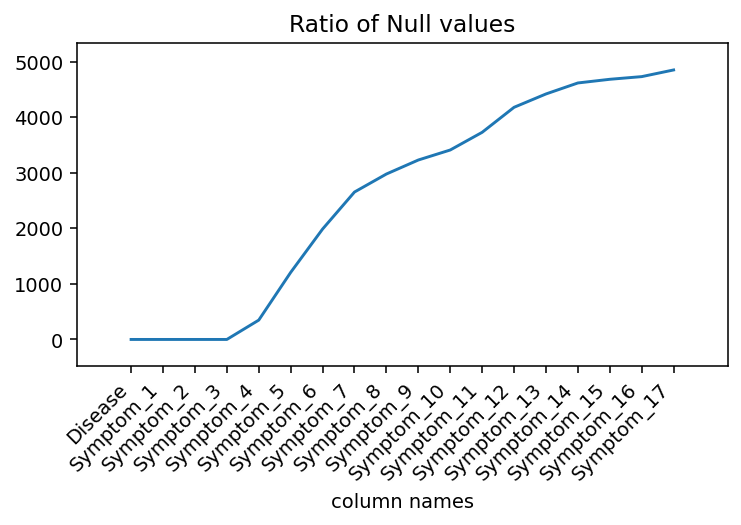

In [7]:
## Plot of null value

plt.figure(figsize=(6, 3), dpi=140)
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation = 45, horizontalalignment = 'right')
plt.title('Ratio of Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [8]:
disease_counts = data['Disease'].value_counts()
disease_counts

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

## Preprocess

In [9]:
## Fill nan values
data = data.fillna(0)
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
symp = data.drop('Disease', axis=1)
symp = symp.columns.to_numpy()
print(symp)

['Symptom_1' 'Symptom_2' 'Symptom_3' 'Symptom_4' 'Symptom_5' 'Symptom_6'
 'Symptom_7' 'Symptom_8' 'Symptom_9' 'Symptom_10' 'Symptom_11'
 'Symptom_12' 'Symptom_13' 'Symptom_14' 'Symptom_15' 'Symptom_16'
 'Symptom_17']


In [11]:
all_symp = set()

for col in symp:
    unique_symp = data[col].unique()
    all_symp.update(unique_symp)

# Displays a list of symptoms that appear in the dataset
print("Gejala yang muncul dalam dataset:")
print(all_symp)

Gejala yang muncul dalam dataset:
{0, ' obesity', ' loss_of_appetite', ' distention_of_abdomen', ' mucoid_sputum', ' receiving_unsterile_injections', ' palpitations', ' weakness_in_limbs', ' painful_walking', ' excessive_hunger', ' muscle_pain', ' irritability', ' foul_smell_of urine', ' hip_joint_pain', ' phlegm', ' blurred_and_distorted_vision', ' rusty_sputum', ' breathlessness', ' movement_stiffness', ' acute_liver_failure', ' stomach_pain', ' stomach_bleeding', ' bladder_discomfort', ' ulcers_on_tongue', ' malaise', ' continuous_feel_of_urine', ' shivering', ' family_history', ' pain_in_anal_region', ' receiving_blood_transfusion', ' neck_pain', ' runny_nose', ' fatigue', ' belly_pain', ' polyuria', ' slurred_speech', ' indigestion', ' mood_swings', ' irritation_in_anus', ' constipation', ' vomiting', ' prominent_veins_on_calf', ' spinning_movements', ' altered_sensorium', ' burning_micturition', ' blood_in_sputum', ' watering_from_eyes', ' loss_of_smell', ' depression', ' pain_be

In [12]:
all_symp = list(all_symp)
print(all_symp)

[0, ' obesity', ' loss_of_appetite', ' distention_of_abdomen', ' mucoid_sputum', ' receiving_unsterile_injections', ' palpitations', ' weakness_in_limbs', ' painful_walking', ' excessive_hunger', ' muscle_pain', ' irritability', ' foul_smell_of urine', ' hip_joint_pain', ' phlegm', ' blurred_and_distorted_vision', ' rusty_sputum', ' breathlessness', ' movement_stiffness', ' acute_liver_failure', ' stomach_pain', ' stomach_bleeding', ' bladder_discomfort', ' ulcers_on_tongue', ' malaise', ' continuous_feel_of_urine', ' shivering', ' family_history', ' pain_in_anal_region', ' receiving_blood_transfusion', ' neck_pain', ' runny_nose', ' fatigue', ' belly_pain', ' polyuria', ' slurred_speech', ' indigestion', ' mood_swings', ' irritation_in_anus', ' constipation', ' vomiting', ' prominent_veins_on_calf', ' spinning_movements', ' altered_sensorium', ' burning_micturition', ' blood_in_sputum', ' watering_from_eyes', ' loss_of_smell', ' depression', ' pain_behind_the_eyes', ' yellowing_of_eye

In [13]:
# Changing the dataset with reference to existing symptoms
for symps in all_symp:
    data[symps] = data.apply(lambda row: 1 if symps in row.values else 0, axis=1)

print(data.head())

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches         0         0         0         0         0   
1                     0         0         0         0         0         0   
2                     0         0         0         0         0         0   
3                     0         0         0         0         0         0   
4                     0         0         0         0         0         0   

   ...  blackheads  enlarged_thyroid  yellowish_sk

In [14]:
import numpy as np
del_col = np.append(symp,0)
data = data.drop(del_col, axis=1)
print(data.head())

            Disease   obesity   loss_of_appetite   distention_of_abdomen  \
0  Fungal infection         0                  0                       0   
1  Fungal infection         0                  0                       0   
2  Fungal infection         0                  0                       0   
3  Fungal infection         0                  0                       0   
4  Fungal infection         0                  0                       0   

    mucoid_sputum   receiving_unsterile_injections   palpitations  \
0               0                                0              0   
1               0                                0              0   
2               0                                0              0   
3               0                                0              0   
4               0                                0              0   

    weakness_in_limbs   painful_walking   excessive_hunger  ...   blackheads  \
0                   0                 0         

In [15]:
## Check
data.iloc[332]

Disease                   Hypoglycemia
 obesity                             0
 loss_of_appetite                    0
 distention_of_abdomen               0
 mucoid_sputum                       0
                              ...     
 spotting_ urination                 0
 dark_urine                          0
 diarrhoea                           0
 pus_filled_pimples                  0
 skin_peeling                        0
Name: 332, Length: 132, dtype: object

In [16]:
preprocess = pd.DataFrame(data)
preprocess

,Disease,obesity,loss_of_appetite,distention_of_abdomen,mucoid_sputum,receiving_unsterile_injections,palpitations,weakness_in_limbs,painful_walking,excessive_hunger,...,blackheads,enlarged_thyroid,yellowish_skin,cramps,history_of_alcohol_consumption,spotting_ urination,dark_urine,diarrhoea,pus_filled_pimples,skin_peeling
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,Acne,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4917,Urinary tract infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
pd.DataFrame(preprocess.columns)

,0
0,Disease
1,obesity
2,loss_of_appetite
3,distention_of_abdomen
4,mucoid_sputum
...,...
127,spotting_ urination
128,dark_urine
129,diarrhoea
130,pus_filled_pimples


In [18]:
# Encode disease
one_hot_encoded_data = pd.get_dummies(preprocess, columns = ['Disease'])
one_hot_encoded_data

,obesity,loss_of_appetite,distention_of_abdomen,mucoid_sputum,receiving_unsterile_injections,palpitations,weakness_in_limbs,painful_walking,excessive_hunger,muscle_pain,...,Disease_Osteoarthristis,Disease_Paralysis (brain hemorrhage),Disease_Peptic ulcer diseae,Disease_Pneumonia,Disease_Psoriasis,Disease_Tuberculosis,Disease_Typhoid,Disease_Urinary tract infection,Disease_Varicose veins,Disease_hepatitis A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Data Exploration (after transformation)

In [19]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 172 entries,  obesity to Disease_hepatitis A
dtypes: int64(131), uint8(41)
memory usage: 5.1 MB


In [20]:
pd.DataFrame(one_hot_encoded_data.columns)

,0
0,obesity
1,loss_of_appetite
2,distention_of_abdomen
3,mucoid_sputum
4,receiving_unsterile_injections
...,...
167,Disease_Tuberculosis
168,Disease_Typhoid
169,Disease_Urinary tract infection
170,Disease_Varicose veins


In [21]:
symptomps = one_hot_encoded_data.drop(one_hot_encoded_data.iloc[:, 131:172],axis = 1)
symptomps

,obesity,loss_of_appetite,distention_of_abdomen,mucoid_sputum,receiving_unsterile_injections,palpitations,weakness_in_limbs,painful_walking,excessive_hunger,muscle_pain,...,blackheads,enlarged_thyroid,yellowish_skin,cramps,history_of_alcohol_consumption,spotting_ urination,dark_urine,diarrhoea,pus_filled_pimples,skin_peeling
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
for column in symptomps:
    count = preprocess[column].sum()
    print(f"{column}:\n",count)
    print()

 obesity:
 228

 loss_of_appetite:
 1152

 distention_of_abdomen:
 114

 mucoid_sputum:
 114

 receiving_unsterile_injections:
 120

 palpitations:
 120

 weakness_in_limbs:
 108

 painful_walking:
 228

 excessive_hunger:
 462

 muscle_pain:
 474

 irritability:
 474

 foul_smell_of urine:
 102

 hip_joint_pain:
 114

 phlegm:
 354

 blurred_and_distorted_vision:
 342

 rusty_sputum:
 120

 breathlessness:
 450

 movement_stiffness:
 114

 acute_liver_failure:
 114

 stomach_pain:
 222

 stomach_bleeding:
 120

 bladder_discomfort:
 114

 ulcers_on_tongue:
 108

 malaise:
 702

 continuous_feel_of_urine:
 114

 shivering:
 108

 family_history:
 228

 pain_in_anal_region:
 114

 receiving_blood_transfusion:
 120

 neck_pain:
 228

 runny_nose:
 120

 fatigue:
 1932

 belly_pain:
 114

 polyuria:
 120

 slurred_speech:
 120

 indigestion:
 222

 mood_swings:
 228

 irritation_in_anus:
 114

 constipation:
 228

 vomiting:
 1914

 prominent_veins_on_calf:
 114

 spinning_movements:
 108

## **Training**

### Neural Network

In [23]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy
# Create a TensorFlow Dataset from your features and labels
features = one_hot_encoded_data.drop(one_hot_encoded_data.iloc[:, 131:172], axis=1)
labels = one_hot_encoded_data.iloc[:, 131:172]
dataset = tf.data.Dataset.from_tensor_slices((features, labels))

# Define the percentages of the dataset to use for validation and testing
validation_percentage = 0.2
test_percentage = 0.1

# Calculate the number of samples for validation and testing
num_samples = len(features)
num_validation_samples = int(validation_percentage * num_samples)
num_test_samples = int(test_percentage * num_samples)

# Shuffle the dataset
dataset = dataset.shuffle(num_samples)

# Split the dataset into training, validation, and testing sets
train_dataset = dataset.skip(num_validation_samples + num_test_samples)
validation_dataset = dataset.skip(num_test_samples).take(num_validation_samples)
test_dataset = dataset.take(num_test_samples)

# Configure the datasets for training and testing
batch_size = 12
train_dataset = train_dataset.batch(batch_size)
validation_dataset = validation_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.02),
    tf.keras.layers.Dense(labels.shape[1], activation='softmax')
])

model.compile(loss = 'CategoricalCrossentropy',
              optimizer = RMSprop(learning_rate=0.01),
                                  metrics= ['acc'])

In [24]:
# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(train_dataset, epochs=20, steps_per_epoch=5,
                    validation_data=validation_dataset, validation_steps=5,callbacks=[early_stopping], verbose=1)

# Evaluate the model on the test set
print("test dataset:")
test_loss, test_accuracy = model.evaluate(test_dataset, steps=5)

Epoch 1/20
5/5 [==============================] - 1s 84ms/step - loss: 3.8359 - acc: 0.0667 - val_loss: 3.8159 - val_acc: 0.0667
Epoch 2/20
5/5 [==============================] - 0s 22ms/step - loss: 3.6573 - acc: 0.0833 - val_loss: 3.5174 - val_acc: 0.0500
Epoch 3/20
5/5 [==============================] - 0s 21ms/step - loss: 3.3921 - acc: 0.1500 - val_loss: 3.1934 - val_acc: 0.1333
Epoch 4/20
5/5 [==============================] - 0s 17ms/step - loss: 3.0875 - acc: 0.1667 - val_loss: 2.9862 - val_acc: 0.1500
Epoch 5/20
5/5 [==============================] - 0s 15ms/step - loss: 2.7230 - acc: 0.2833 - val_loss: 2.7550 - val_acc: 0.1667
Epoch 6/20
5/5 [==============================] - 0s 21ms/step - loss: 2.1330 - acc: 0.5000 - val_loss: 2.6000 - val_acc: 0.2167
Epoch 7/20
5/5 [==============================] - 0s 17ms/step - loss: 2.1913 - acc: 0.4167 - val_loss: 1.9224 - val_acc: 0.5000
Epoch 8/20
5/5 [==============================] - 0s 22ms/step - loss: 1.5879 - acc: 0.5833 - val

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                2112      
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 41)                2665      
                                                                 
Total params: 7,433
Trainable params: 7,433
Non-trainable params: 0
_________________________________________________________________


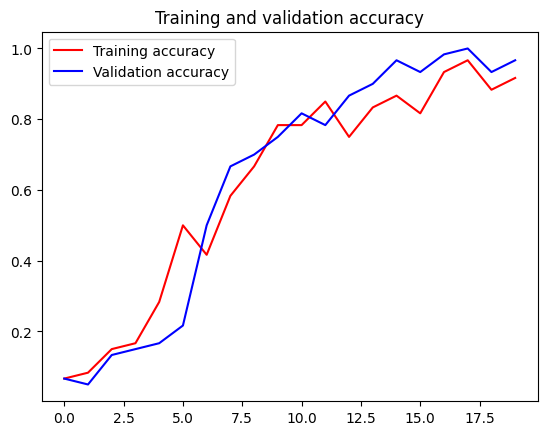

<Figure size 640x480 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [27]:
y_pred = []
output = []
for batch in test_dataset:
    X, y = batch
    y_pred_batch = model.predict(X)
    y_pred.append(y_pred_batch)
    b = pd.DataFrame(y)
    for row_index in range (len(b)):
      max_column = b.iloc[row_index].idxmax()
      disease = labels.columns[max_column]
      disease = disease.replace('Disease_','')
      output.append(disease)

# Menggabungkan hasil prediksi dari setiap batch menjadi satu array
y_pred = np.concatenate(y_pred, axis=0)

1/1 [==============================] - 0s 22ms/step


In [28]:
a = pd.DataFrame(y_pred)
pred = []

# Get the column with the maximum value from the specified row
for row_index in range (len(a)):
  max_column = a.iloc[row_index].idxmax()
  disease = labels.columns[max_column]
  disease = disease.replace('Disease_','')
  pred.append(disease)

In [29]:
#Classification report
from sklearn.metrics import classification_report
classification_metrics = classification_report(output, pred, zero_division=1)
print(classification_metrics)

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        13
                                   AIDS       0.89      1.00      0.94        16
                                   Acne       1.00      1.00      1.00        13
                    Alcoholic hepatitis       1.00      0.86      0.92         7
                                Allergy       1.00      1.00      1.00         8
                              Arthritis       1.00      1.00      1.00        15
                       Bronchial Asthma       1.00      1.00      1.00         8
                   Cervical spondylosis       1.00      1.00      1.00        10
                            Chicken pox       1.00      1.00      1.00        11
                    Chronic cholestasis       1.00      1.00      1.00        13
                            Common Cold       1.00      1.00      1.00        17
                           

In [30]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(output, pred)

print("Akurasi:", accuracy)

Akurasi: 0.9898373983739838


## INPUT - OUTPUT TRANSFORMATION

In [31]:
#### TRANSFORM INPUT
def transform_input(input):
  sym = ['pus_filled_pimples', 'brittle_nails', 'weakness_of_one_body_side', 'pain_in_anal_region', 'joint_pain', 'cramps', 'loss_of_smell', 'bruising', 'nausea', 'shivering', 'rusty_sputum', 'internal_itching', 'yellowish_skin', 'diarrhea', 'mucoid_sputum', 'bladder_discomfort', 'chest_pain', 'blurred_and_distorted_vision', 'dizziness', 'extra_marital_contacts', 'swelling_of_stomach', 'lethargy', 'irregular_sugar_level', 'inflammatory_nails', 'congestion', 'cold_hands_and_feets', 'swollen_blood_vessels', 'swelling_joints', 'chills', 'malaise', 'anxiety', 'small_dents_in_nails', 'swelled_lymph_nodes', 'stiff_neck', 'fluid_overload', 'visual_disturbances', 'palpitations', 'altered_sensorium', 'bloody_stool', 'restlessness', 'puffy_face_and_eyes', 'constipation', 'continuous_feel_of_urine', 'receiving_blood_transfusion', 'swollen_legs', 'throat_irritation', 'abnormal_menstruation', 'loss_of_appetite', 'coma', 'back_pain', 'weight_gain', 'itching', 'distention_of_abdomen', 'high_fever', 'drying_and_tingling_lips', 'depression', 'foul_smell_ofurine', 'enlarged_thyroid', 'mild_fever', 'dischromic_patches', 'dehydration', 'sweating', 'red_sore_around_nose', 'nodal_skin_eruptions', 'lack_of_concentration', 'hip_joint_pain', 'weight_loss', 'muscle_pain', 'knee_pain', 'patches_in_throat', 'continuous_sneezing', 'sunken_eyes', 'burning_micturition', 'scurrying', 'pain_behind_the_eyes', 'family_history', 'prominent_veins_on_calf', 'unsteadiness', 'ulcers_on_tongue', 'irritability', 'blackheads', 'redness_of_eyes', 'runny_nose', 'painful_walking', 'receiving_unsterile_injections', 'muscle_weakness', 'history_of_alcohol_consumption', 'polyuria', 'toxic_look_(typhos)', 'pain_during_bowel_movements', 'abdominal_pain', 'silver_like_dusting', 'acidity', 'excessive_hunger', 'indigestion', 'loss_of_balance', 'spotting_urination', 'belly_pain', 'sinus_pressure', 'acute_liver_failure', 'headache', 'cough', 'slurred_speech', 'breathlessness', 'dark_urine', 'stomach_bleeding', 'yellow_crust_ooze', 'fatigue', 'blood_in_sputum', 'neck_pain', 'passage_of_gases', 'stomach_pain', 'vomiting', 'weakness_in_limbs', 'watering_from_eyes', 'red_spots_over_body', 'increased_appetite', 'mood_swings', 'muscle_wasting', 'phlegm', 'skin_rash', 'obesity', 'fast_heart_rate', 'movement_stiffness', 'irritation_in_anus', 'spinning_movements', 'skin_peeling', 'yellow_urine', 'yellowing_of_eyes', 'blister', 'swollen_extremeties']

  for i in range(len(sym)):
    if sym[i] in input:
      sym[i] = 1
    else:
      sym[i] = 0

  return sym

In [32]:
#### TRANSFORM OUTPUT
def transform_output(output):
  dis = ['Disease_(vertigo) Paroymsal  Positional Vertigo', 'Disease_AIDS', 'Disease_Acne', 'Disease_Alcoholic hepatitis', 'Disease_Allergy', 'Disease_Arthritis', 'Disease_Bronchial Asthma', 'Disease_Cervical spondylosis', 'Disease_Chicken pox', 'Disease_Chronic cholestasis', 'Disease_Common Cold', 'Disease_Dengue', 'Disease_Diabetes ', 'Disease_Dimorphic hemmorhoids(piles)', 'Disease_Drug Reaction', 'Disease_Fungal infection', 'Disease_GERD', 'Disease_Gastroenteritis', 'Disease_Heart attack', 'Disease_Hepatitis B', 'Disease_Hepatitis C', 'Disease_Hepatitis D', 'Disease_Hepatitis E', 'Disease_Hypertension ', 'Disease_Hyperthyroidism', 'Disease_Hypoglycemia', 'Disease_Hypothyroidism', 'Disease_Impetigo', 'Disease_Jaundice', 'Disease_Malaria', 'Disease_Migraine', 'Disease_Osteoarthristis', 'Disease_Paralysis (brain hemorrhage)', 'Disease_Peptic ulcer diseae', 'Disease_Pneumonia', 'Disease_Psoriasis', 'Disease_Tuberculosis', 'Disease_Typhoid', 'Disease_Urinary tract infection', 'Disease_Varicose veins', 'Disease_hepatitis A']
  max_index = tf.argmax(output)
  disease = dis[max_index]
  disease = disease.replace('Disease_','')
  return disease

## MODEL DEPLOYMENT

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import tensorflow as tf

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [35]:
with open('/content/drive/MyDrive/my_model.tflite', 'wb') as f:
    f.write(tflite_model)

In [36]:
# Save the TFLite model to Google Drive
tflite_model_path = '/content/drive/MyDrive/my_model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

## MAIN.PY

In [37]:
import tensorflow as tf

# Path to the .pb model file
model_path = '/content/drive/MyDrive/my_model.tflite'

# Load the model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Access the input and output tensors
input_tensor_index = input_details[0]['index']
output_tensor_index = output_details[0]['index']
input_tensor = interpreter.tensor(input_tensor_index)
output_tensor = interpreter.tensor(output_tensor_index)

In [38]:
## Test
# Prepare your input data
#input_data = ['cough', 'dark_urine', 'chest_pain']  # Prepare your input data as per the model requirements
input_data = ['drying_and_tingling_lips',	'mucoid_sputum', 'diarrhea',	'chest_pain',	'phlegm',	'continuous_feel_of_urine',	'bruising']

# Set the input tensor data
input_tensor()[0] = transform_input(input_data)

# Run the inference
interpreter.invoke()

# Get the output tensor data
output_data = output_tensor()[0]

output = transform_output(output_data)
output

'Acne'